In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
def generate_synthetic_ms1_data(num_peaks=3, num_spectra_per_peak=10, num_mz_points=8, rt_range=(0, 30), mz_range=(500, 600), intensity_range=(1000, 100000)):
    """
    Generate synthetic MS1 dataset with peaks composed of multiple non-overlapping spectra.
    
    Parameters:
    - num_peaks: Number of peaks to generate (3 in this case)
    - num_spectra_per_peak: Number of spectra contributing to each peak (10)
    - num_mz_points: Number of m/z values per spectrum (8)
    - rt_range: Tuple specifying the range of Retention Time (RT)
    - mz_range: Tuple specifying the range of m/z values
    - intensity_range: Tuple specifying the intensity range for each spectrum

    Returns:
    - rt_values: Retention Time values (x-axis)
    - mz_values: m/z values (y-axis)
    - intensities: Intensity values (2D array for heatmap)
    """
    # Initialize retention time (RT) and m/z values
    rt_values = np.linspace(rt_range[0], rt_range[1], num_spectra_per_peak * num_peaks)
    mz_values = np.linspace(mz_range[0], mz_range[1], num_mz_points)
    
    # Initialize intensities array
    intensities = np.zeros((len(rt_values), len(mz_values)))
    
    # Generate peaks
    peak_centers = np.linspace(mz_range[0], mz_range[1], num_peaks)  # m/z centers for the peaks

    # For each peak
    for peak_idx, peak_center in enumerate(peak_centers):
        # For each spectrum in the peak
        for spectra_idx in range(num_spectra_per_peak):
            # Each spectrum has the same m/z values
            spectrum_mz_values = mz_values  # m/z values stay the same across spectra in a peak

            # Random intensities for each spectrum (one intensity value for each m/z value)
            spectrum_intensities = np.random.uniform(intensity_range[0], intensity_range[1], num_mz_points)
            
            # Define the RT value for this spectrum (non-overlapping RT range)
            rt_index = peak_idx * num_spectra_per_peak + spectra_idx
            intensities[rt_index, :] = spectrum_intensities  # Assign intensity values to the RT and m/z values

    # Create "gaps" in between spectra (RT direction) and m/z points
    new_intensities = np.zeros((len(rt_values) * 2 - 1, len(mz_values) * 2 - 1))

    for rt_idx in range(len(rt_values)):
        for mz_idx in range(len(mz_values)):
            new_intensities[rt_idx * 2, mz_idx * 2] = intensities[rt_idx, mz_idx]

    return rt_values, mz_values, new_intensities


In [28]:
def plot_ms1_heatmap(rt_values, mz_values, intensities):
    """
    Plot the synthetic MS1 data as a 2D heatmap of RT vs. m/z.
    
    Parameters:
    - rt_values: Retention time (x-axis)
    - mz_values: m/z values (y-axis)    
    - intensities: Intensity values for the heatmap
    """
    plt.figure(figsize=(10, 6))
    plt.imshow(intensities, aspect='auto', cmap='PuBu', extent=[rt_values[0], rt_values[-1], mz_values[0], mz_values[-1]], origin='lower')
    plt.colorbar(label='Intensity')
    plt.xlabel('Retention Time (RT)')
    plt.ylabel('m/z')
    plt.title('Synthetic MS1 Data Heatmap')
    plt.show()

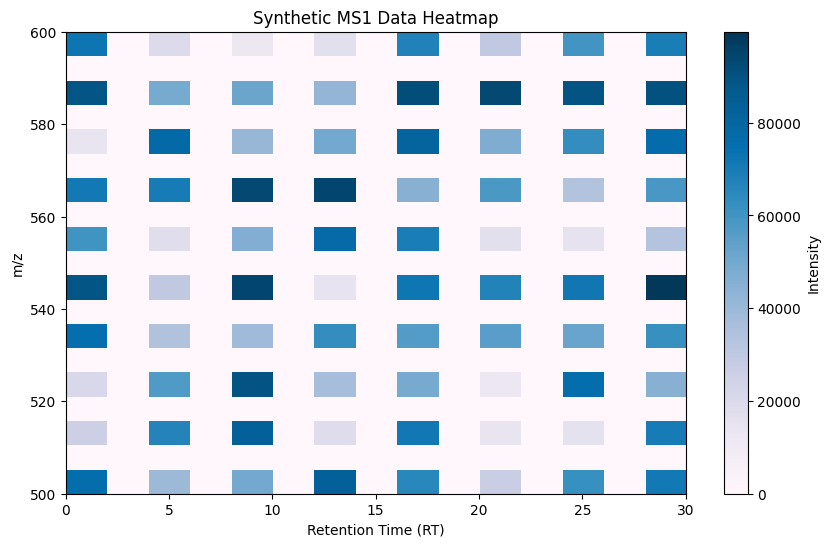

In [29]:
# Example usage: Generate and plot synthetic MS1 data
rt_values, mz_values, intensities = generate_synthetic_ms1_data(num_peaks=1, num_spectra_per_peak=10, num_mz_points=8, rt_range=(0, 30), mz_range=(500, 600), intensity_range=(10000, 100000))
plot_ms1_heatmap(rt_values, mz_values, intensities)